## PINN on damped pendulum

# Physics-Informed Neural Networks (PINNs) for the Damped Pendulum

## Introduction
Physics-Informed Neural Networks (PINNs) are a class of neural networks that incorporate physical laws, typically represented by differential equations, into the learning process. Unlike traditional neural networks, which rely solely on data, PINNs leverage known physical principles to improve generalization and efficiency, particularly in cases with limited data availability.

## The Damped Pendulum
The damped pendulum is a classic example of a nonlinear dynamical system. It consists of a mass \( m \) attached to a rod of length \( L \), swinging under the influence of gravity and subject to a damping force.

The equation of motion for the damped pendulum is given by:

\[\frac{d^2\theta}{dt^2} + \gamma \frac{d\theta}{dt} + \frac{g}{L} \sin(\theta) = 0\]

where:
- \( \theta \) is the angular displacement,
- \( \gamma \) is the damping coefficient,
- \( g \) is the acceleration due to gravity,
- \( L \) is the length of the pendulum.

This equation is nonlinear due to the \( \sin(\theta) \) term, making it challenging to solve analytically in general cases.

## Applying PINNs
A Physics-Informed Neural Network (PINN) can be used to approximate the solution to this equation by incorporating the governing differential equation into the loss function. The approach involves:

1. **Neural Network Representation**: A neural network with parameters \( \theta_{NN} \) is designed to approximate the function \( \theta(t) \).
2. **Loss Function Definition**:
   - **Data Loss**: If some observational data is available, a mean squared error (MSE) loss can be used to minimize the difference between predicted and observed values.
   - **Physics Loss**: The residual of the governing equation is computed using automatic differentiation to ensure compliance with physical laws.
3. **Training**:
   - The network is trained using standard optimization techniques (e.g., Adam or L-BFGS).
   - The total loss is the weighted sum of data loss and physics loss.

The PINN minimizes both the observed data error and the physics residual, ensuring that the learned function satisfies the governing equations even in regions where no data is available.

## Advantages of PINNs for the Damped Pendulum
- **Data Efficiency**: PINNs require fewer data points as they incorporate physical knowledge.
- **Generalization**: They generalize well beyond training points as they enforce physical constraints.
- **Handling Noisy Data**: The physics loss acts as a regularizer, making PINNs robust to noise in measurements.

## Moving to Hamiltonian Neural Networks (HNNs)
Hamiltonian Neural Networks (HNNs) offer an alternative approach to learning dynamical systems, particularly when the system is conservative or has a known Hamiltonian structure. Unlike PINNs, which explicitly enforce physical laws through the loss function, HNNs learn the underlying energy function governing the system dynamics.

### Differences Between HNNs and PINNs
- **Physical Constraint Enforcement**:
  - PINNs explicitly impose the governing differential equations in the loss function.
  - HNNs learn the Hamiltonian function, indirectly enforcing conservation laws.
- **Applicability**:
  - PINNs can be applied to dissipative systems like the damped pendulum.
  - HNNs are more suited for conservative systems where energy conservation plays a key role.
- **Computational Complexity**:
  - PINNs require automatic differentiation to compute physics residuals.
  - HNNs leverage learned Hamiltonians and symplectic gradients, often leading to better stability in long-term predictions.

### Advantages of HNNs
- **Implicit Conservation Laws**: Since HNNs learn the Hamiltonian, they inherently conserve energy in conservative systems.
- **Better Long-Term Prediction**: HNNs often yield more stable solutions over extended time horizons compared to PINNs.
- **Interpretability**: The learned Hamiltonian function provides insights into the underlying system dynamics.

## Conclusion
PINNs and HNNs offer distinct advantages depending on the system being studied. While PINNs are well-suited for general differential equations, including dissipative systems like the damped pendulum, HNNs excel in modeling conservative systems where energy preservation is crucial. Choosing between the two depends on the nature of the system and the desired properties of the learned model.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import solve_ivp
from IPython.display import HTML
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


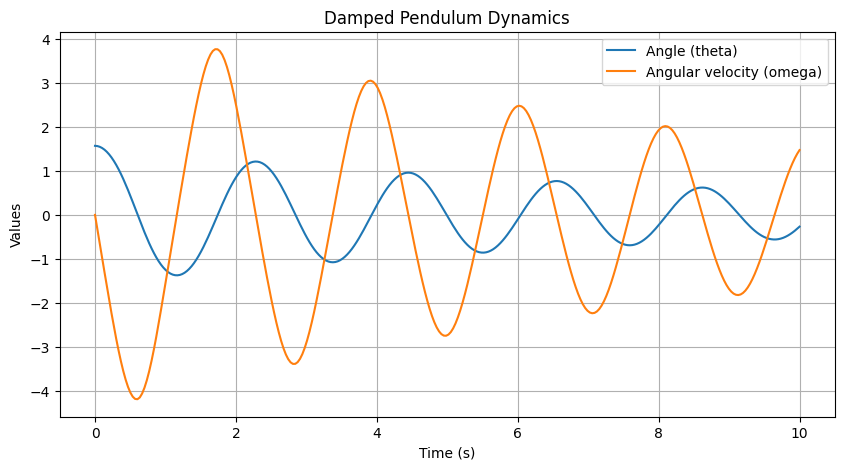

In [3]:
# Define the damped pendulum equation
def damped_pendulum(t, y, b, c):
    theta, omega = y
    dydt = [omega, -b * omega - c * np.sin(theta)]
    return dydt

# Parameters
b = 0.2  # Damping coefficient
c = 9.81  # Gravity constant (assuming unit length)
y0 = [np.pi / 2, 0]  # Initial condition: [initial angle, initial angular velocity]
t_span = (0, 10)  # Time range
t_eval = np.linspace(*t_span, 300)  # Time points for evaluation

# Solve the differential equation
sol = solve_ivp(damped_pendulum, t_span, y0, t_eval=t_eval, args=(b, c))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label='Angle (theta)')
plt.plot(sol.t, sol.y[1], label='Angular velocity (omega)')
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.title('Damped Pendulum Dynamics')
plt.legend()
plt.grid()
plt.show()

## PINN

Epoch 0, Loss: 2.6711485385894775
Epoch 500, Loss: 0.23404653370380402
Epoch 1000, Loss: 0.22257527709007263
Epoch 1500, Loss: 0.21805758774280548
Epoch 2000, Loss: 0.2181580662727356
Epoch 2500, Loss: 0.21062953770160675
Epoch 3000, Loss: 0.20947147905826569
Epoch 3500, Loss: 0.20760251581668854
Epoch 4000, Loss: 0.20412878692150116
Epoch 4500, Loss: 0.2003663182258606
Epoch 5000, Loss: 0.20004768669605255
Epoch 5500, Loss: 0.20030155777931213
Epoch 6000, Loss: 0.19858652353286743
Epoch 6500, Loss: 0.19320251047611237
Epoch 7000, Loss: 0.19223955273628235
Epoch 7500, Loss: 0.1873759776353836
Epoch 8000, Loss: 0.1840297281742096
Epoch 8500, Loss: 0.1803165078163147
Epoch 9000, Loss: 0.18444620072841644
Epoch 9500, Loss: 0.17454510927200317
Epoch 10000, Loss: 0.17361250519752502
Epoch 10500, Loss: 0.1719212830066681
Epoch 11000, Loss: 0.171584352850914
Epoch 11500, Loss: 0.17270886898040771
Epoch 12000, Loss: 0.16891784965991974
Epoch 12500, Loss: 0.16762931644916534
Epoch 13000, Loss: 

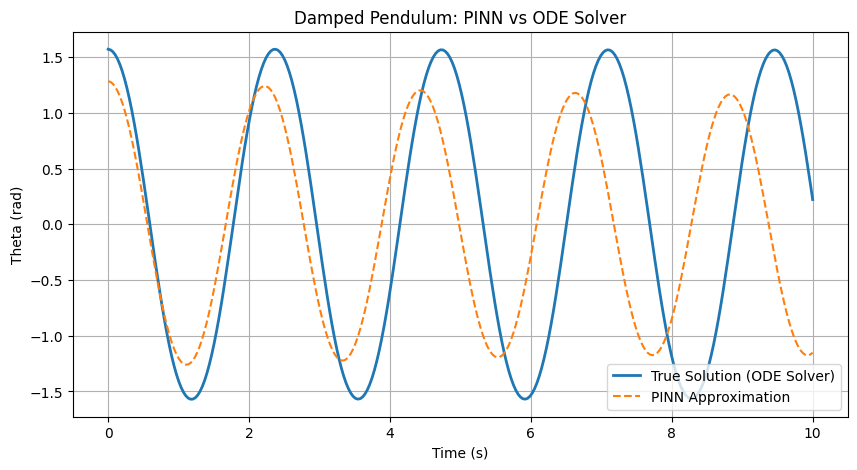

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the governing equation for the damped pendulum
b = 0.0  # Damping coefficient
c = 9.81  # Gravity constant

# Solve the system using a numerical ODE solver for comparison
def damped_pendulum(t, y, b, c):
    theta, omega = y
    return [omega, -b * omega - c * np.sin(theta)]


t_span = (0, 10)
t_train = torch.linspace(*t_span, 300).reshape(-1, 1)  # Training time points
y0 = [np.pi / 2, 0]  # Initial conditions
sol = solve_ivp(damped_pendulum, t_span, y0, t_eval=t_train.numpy().flatten(), args=(b, c))
theta_true = torch.tensor(sol.y[0], dtype=torch.float32).reshape(-1, 1)

lambda1, lambda2 = 1e-1, 1e-4  # Regularization parameters

# Define the PINN model
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),
            nn.Tanh(),
            nn.Linear(32, 32),
            nn.Tanh(),
            nn.Linear(32, 1)
        )

    def forward(self, t):
        return self.net(t)

# Initialize the model and optimizer
model = PINN()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 25000
for epoch in range(epochs):
    optimizer.zero_grad()

    t = t_train.clone().requires_grad_(True)
    theta_pred = model(t)

    # Initial condition loss
    u_boundary = theta_pred[0]  # Evaluate network at t = 0
    loss1 = (torch.squeeze(u_boundary) - np.pi / 2) ** 2  # Enforce theta(0) = pi/2

    # Compute derivative u'(0) via autograd
    dudt_boundary = torch.autograd.grad(
        outputs=u_boundary,
        inputs=t,
        grad_outputs=torch.ones_like(u_boundary),
        create_graph=True
    )[0][0]  # Ensure we get a scalar

    loss2 = (torch.squeeze(dudt_boundary) - 0) ** 2  # Enforce theta'(0) = 0

    # Compute derivatives using autograd
    theta_t = torch.autograd.grad(theta_pred, t, torch.ones_like(theta_pred), create_graph=True)[0]
    theta_tt = torch.autograd.grad(theta_t, t, torch.ones_like(theta_t), create_graph=True)[0]

    # Compute the physics-informed loss (forcing the neural network to satisfy the ODE)
    residual = theta_tt + b * theta_t + c * torch.sin(theta_pred)
    loss_pde = torch.mean(residual ** 2)

    # Total loss
    loss = loss_pde + lambda1 * loss1 + lambda2 * loss2

    # Backpropagation
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Generate predictions
theta_pinn = model(t_train).detach().numpy()

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t_train.numpy(), theta_true.numpy(), label="True Solution (ODE Solver)", linewidth=2)
plt.plot(t_train.numpy(), theta_pinn, label="PINN Approximation", linestyle="dashed")
plt.xlabel("Time (s)")
plt.ylabel("Theta (rad)")
plt.title("Damped Pendulum: PINN vs ODE Solver")
plt.legend()
plt.grid()
plt.show()

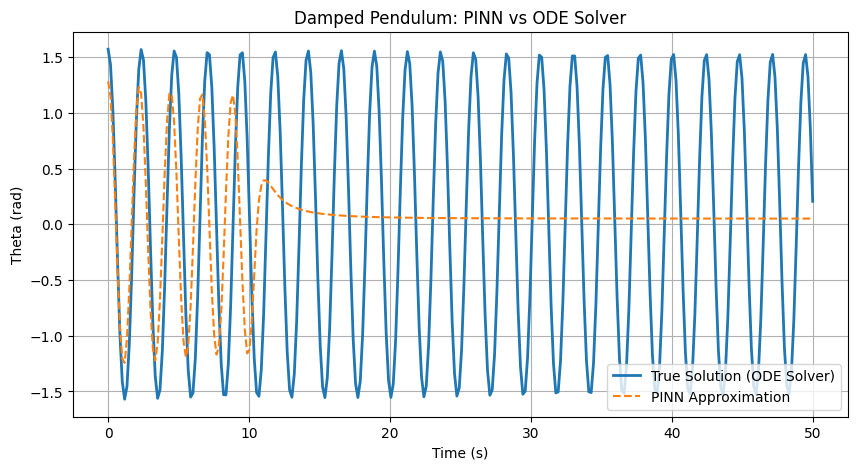

In [6]:
# Generate predictions

t_span = (0, 50)
t_train = torch.linspace(*t_span, 300).reshape(-1, 1)  # Training time points
y0 = [np.pi / 2, 0]  # Initial conditions
sol = solve_ivp(damped_pendulum, t_span, y0, t_eval=t_train.numpy().flatten(), args=(b, c))
theta_true = torch.tensor(sol.y[0], dtype=torch.float32).reshape(-1, 1)
theta_pinn = model(t_train).detach().numpy()

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t_train.numpy(), theta_true.numpy(), label="True Solution (ODE Solver)", linewidth=2)
plt.plot(t_train.numpy(), theta_pinn, label="PINN Approximation", linestyle="dashed")
plt.xlabel("Time (s)")
plt.ylabel("Theta (rad)")
plt.title("Damped Pendulum: PINN vs ODE Solver")
plt.legend()
plt.grid()
plt.show()

## PINN with learnable damping

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from scipy.integrate import solve_ivp

# Define the governing equation for the damped pendulum
true_b = 0.2  # True damping coefficient (unknown to the model)
c = 9.81  # Gravity constant
t_span = (0, 10)
t_train = torch.linspace(*t_span, 300).reshape(-1, 1)
t_train = t_train.requires_grad_(True)  # Ensure gradients can be computed

# Solve the system using a numerical ODE solver for comparison
def damped_pendulum(t, y, b, c):
    theta, omega = y
    return [omega, -b * omega - c * np.sin(theta)]

y0 = [np.pi / 2, 0]  # Initial conditions
sol = solve_ivp(damped_pendulum, t_span, y0, t_eval=t_train.detach().numpy().flatten(), args=(true_b, c))

# Add noise to simulate measurement errors
noise_std = 0.05  # Noise standard deviation
theta_noisy = sol.y[0] + noise_std * np.random.randn(*sol.y[0].shape)
theta_noisy = torch.tensor(theta_noisy, dtype=torch.float32).reshape(-1, 1)

# Define the improved PINN model
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 64),
            nn.SiLU(),
            nn.Linear(64, 64),
            nn.SiLU(),
            nn.Linear(64, 64),
            nn.SiLU(),
            nn.Linear(64, 1)
        )
        self.b = nn.Parameter(torch.tensor(0.5, dtype=torch.float32))  # Initialize with an arbitrary guess

    def forward(self, t):
        return self.net(t)

# Initialize model and optimizer
model = PINN()
optimizer = optim.Adam(model.parameters(), lr=0.005)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=5000, verbose=True)

lambda1, lambda2, lambda3 = 1e-1, 1e-4, 1e-0  # Regularization parameters
batch_size = 64
num_batches = len(t_train) // batch_size

# Pre-train on noisy data
for epoch in range(5000):
    optimizer.zero_grad()
    theta_pred = model(t_train)
    loss_data = torch.mean((theta_pred - theta_noisy) ** 2)
    loss_data.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print(f"Pre-train Epoch {epoch}, Loss: {loss_data.item()}")

# Main training loop
epochs = 50000
for epoch in range(epochs):
    optimizer.zero_grad()
    indices = torch.randperm(len(t_train))[:batch_size]
    t = t_train[indices].clone().requires_grad_(True)
    theta_pred = model(t)

    # Compute derivatives
    theta_t = torch.autograd.grad(theta_pred, t, torch.ones_like(theta_pred), create_graph=True)[0]
    theta_tt = torch.autograd.grad(theta_t, t, torch.ones_like(theta_t), create_graph=True)[0]

    # Physics-informed loss
    residual = theta_tt + model.b * theta_t + c * torch.sin(theta_pred)
    loss_pde = torch.mean(residual ** 2)

    # Initial condition loss
    t0 = t_train[0].clone().detach().requires_grad_(True)
    loss1 = (model(t0) - np.pi / 2) ** 2
    loss2 = (torch.autograd.grad(model(t0), t0, torch.ones_like(model(t0)), create_graph=True)[0] - 0) ** 2

    # Data loss
    loss_data = torch.mean((model(t_train) - theta_noisy) ** 2)

    # Adaptive weight balancing
    total_loss = loss_pde + lambda1 * loss1 + lambda2 * loss2 + lambda3 * loss_data
    total_loss.backward()

    # Gradient clipping
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step(total_loss)

    if epoch % 2500 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss.item()}, Learned b: {model.b.item()}")


Pre-train Epoch 0, Loss: 0.544587254524231
Pre-train Epoch 1000, Loss: 0.0022968119010329247
Pre-train Epoch 2000, Loss: 0.002097273478284478
Pre-train Epoch 3000, Loss: 0.0020875802729278803
Pre-train Epoch 4000, Loss: 0.002049568109214306
Epoch 0, Loss: 1.7488477230072021, Learned b: 0.4950000047683716
Epoch 2500, Loss: 0.22582226991653442, Learned b: 0.4993787705898285
Epoch 5000, Loss: 0.14189650118350983, Learned b: 0.35985705256462097
Epoch 7500, Loss: 0.038875728845596313, Learned b: 0.2792394459247589
Epoch 10000, Loss: 0.03375016525387764, Learned b: 0.24177053570747375
Epoch 12500, Loss: 0.04440280422568321, Learned b: 0.23043781518936157
Epoch 15000, Loss: 0.0389806404709816, Learned b: 0.23163571953773499
Epoch 17500, Loss: 0.019763953983783722, Learned b: 0.21505096554756165
Epoch 20000, Loss: 0.03989693894982338, Learned b: 0.21497228741645813
Epoch 22500, Loss: 0.012881478294730186, Learned b: 0.2091606706380844
Epoch 25000, Loss: 0.01743866503238678, Learned b: 0.211928

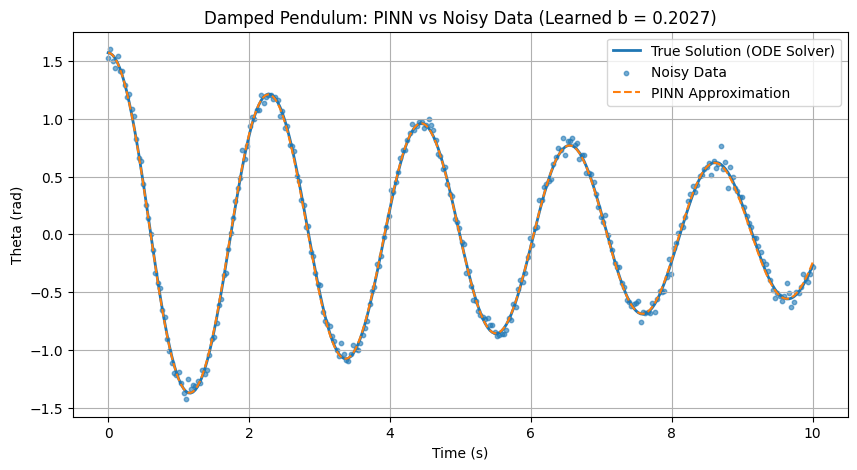

In [58]:
t_span = (0, 10)
t_train = torch.linspace(*t_span, 300).reshape(-1, 1)
t_train = t_train.requires_grad_(True)  # Ensure gradients can be computed
y0 = [np.pi / 2, 0]  # Initial conditions
sol = solve_ivp(damped_pendulum, t_span, y0, t_eval=t_train.detach().numpy().flatten(), args=(true_b, c))
# Generate predictions
theta_pinn = model(t_train).detach().numpy()

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t_train.detach().numpy(), sol.y[0], label="True Solution (ODE Solver)", linewidth=2, )
plt.scatter(t_train.detach().numpy(), theta_noisy.numpy(), label="Noisy Data", s=10, alpha=0.6)
plt.plot(t_train.detach().numpy(), theta_pinn, label="PINN Approximation", linestyle="dashed")
plt.xlabel("Time (s)")
plt.ylabel("Theta (rad)")
plt.title(f"Damped Pendulum: PINN vs Noisy Data (Learned b = {model.b.item():.4f})")
plt.legend()
plt.grid()
plt.show()

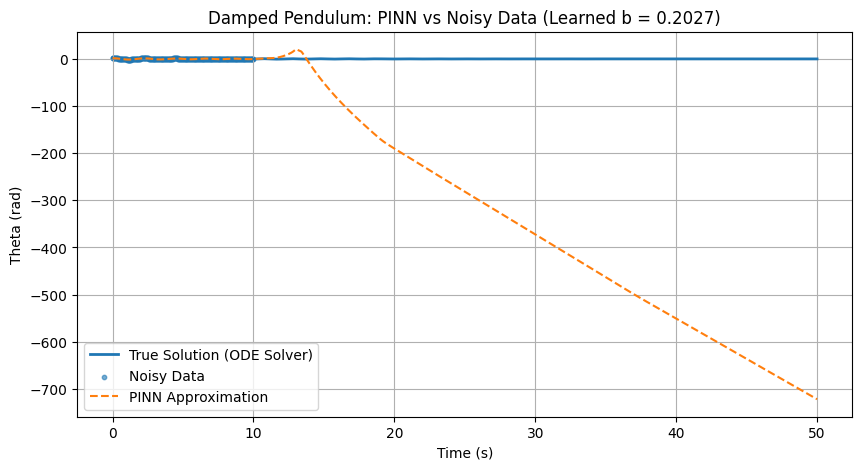

In [59]:
t_span = (0, 50)
t_test = torch.linspace(*t_span, 5000).reshape(-1, 1)  # Training time points

# Generate predictions
theta_pinn = model(t_test).detach().numpy()

y0 = [np.pi / 2, 0]  # Initial conditions
sol = solve_ivp(damped_pendulum, t_span, y0, t_eval=t_test.numpy().flatten(), args=(true_b, c))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t_test.numpy(), sol.y[0], label="True Solution (ODE Solver)", linewidth=2)
plt.scatter(t_train.detach().numpy(), theta_noisy.numpy(), label="Noisy Data", s=10, alpha=0.6)
plt.plot(t_test.numpy(), theta_pinn, label="PINN Approximation", linestyle="dashed")
plt.xlabel("Time (s)")
plt.ylabel("Theta (rad)")
plt.title(f"Damped Pendulum: PINN vs Noisy Data (Learned b = {model.b.item():.4f})")
plt.legend()
plt.grid()
plt.show()

## Standard NN for comparison

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from scipy.integrate import solve_ivp

# Define constants
true_b = 0.2  # True damping coefficient (unknown to the model)
c = 9.81  # Gravity constant
t_span = (0, 10)
t_train = torch.linspace(*t_span, 300).reshape(-1, 1)  # Training time points

# Solve the system using a numerical ODE solver for ground truth
def damped_pendulum(t, y, b, c):
    theta, omega = y
    return [omega, -b * omega - c * np.sin(theta)]

y0 = [np.pi / 2, 0]  # Initial conditions
sol = solve_ivp(damped_pendulum, t_span, y0, t_eval=t_train.numpy().flatten(), args=(true_b, c))

# Add noise to simulate measurement errors
noise_std = 0.05  # Noise standard deviation
theta_noisy = sol.y[0] + noise_std * np.random.randn(*sol.y[0].shape)
theta_noisy = torch.tensor(theta_noisy, dtype=torch.float32).reshape(-1, 1)

# Define a standard neural network model (purely data-driven)
class StandardNN(nn.Module):
    def __init__(self):
        super(StandardNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),
            nn.Tanh(),
            nn.Linear(32, 32),
            nn.Tanh(),
            nn.Linear(32, 1)
        )

    def forward(self, t):
        return self.net(t)

# Initialize the model and optimizer
model = StandardNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()  # Mean Squared Error Loss

# Training loop
epochs = 100000
for epoch in range(epochs):
    optimizer.zero_grad()

    theta_pred = model(t_train)
    loss = criterion(theta_pred, theta_noisy)  # Minimize error w.r.t. noisy observations

    loss.backward()
    optimizer.step()

    if epoch % 2500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")


Epoch 0, Loss: 0.5144235491752625
Epoch 2500, Loss: 0.004165233112871647
Epoch 5000, Loss: 0.002584990346804261
Epoch 7500, Loss: 0.0022655902430415154
Epoch 10000, Loss: 0.002194620668888092
Epoch 12500, Loss: 0.002147761872038245
Epoch 15000, Loss: 0.0023262090981006622
Epoch 17500, Loss: 0.0021139883901923895
Epoch 20000, Loss: 0.002128192689269781
Epoch 22500, Loss: 0.002096683019772172
Epoch 25000, Loss: 0.002129014814272523
Epoch 27500, Loss: 0.0021008518524467945
Epoch 30000, Loss: 0.002053271047770977
Epoch 32500, Loss: 0.0020023079123347998
Epoch 35000, Loss: 0.001983021153137088
Epoch 37500, Loss: 0.001973773119971156
Epoch 40000, Loss: 0.001968009863048792
Epoch 42500, Loss: 0.001985749462619424
Epoch 45000, Loss: 0.0019614596385508776
Epoch 47500, Loss: 0.0019588733557611704
Epoch 50000, Loss: 0.0019562693778425455
Epoch 52500, Loss: 0.0019450936233624816
Epoch 55000, Loss: 0.001974955666810274
Epoch 57500, Loss: 0.0019167725695297122
Epoch 60000, Loss: 0.001904457807540893

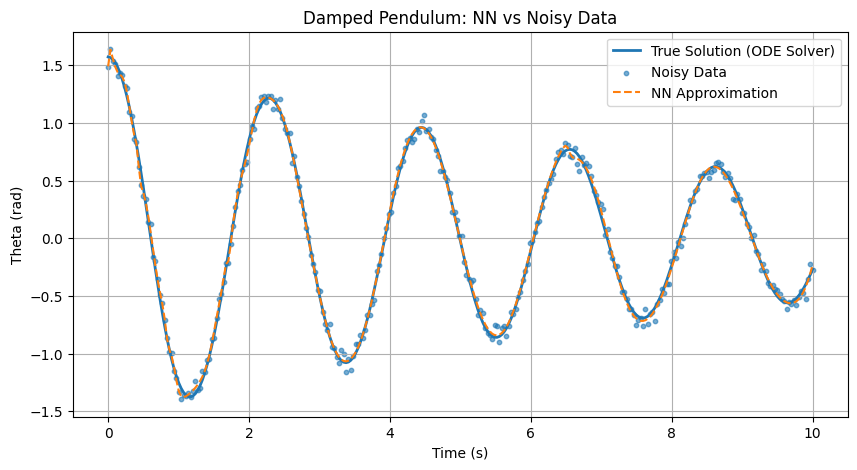

In [63]:
# Generate predictions
theta_nn = model(t_train).detach().numpy()

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t_train.numpy(), sol.y[0], label="True Solution (ODE Solver)", linewidth=2, )
plt.scatter(t_train.numpy(), theta_noisy.numpy(), label="Noisy Data", s=10, alpha=0.6)
plt.plot(t_train.numpy(), theta_nn, label="NN Approximation", linestyle="dashed")
plt.xlabel("Time (s)")
plt.ylabel("Theta (rad)")
plt.title(f"Damped Pendulum: NN vs Noisy Data")
plt.legend()
plt.grid()
plt.show()

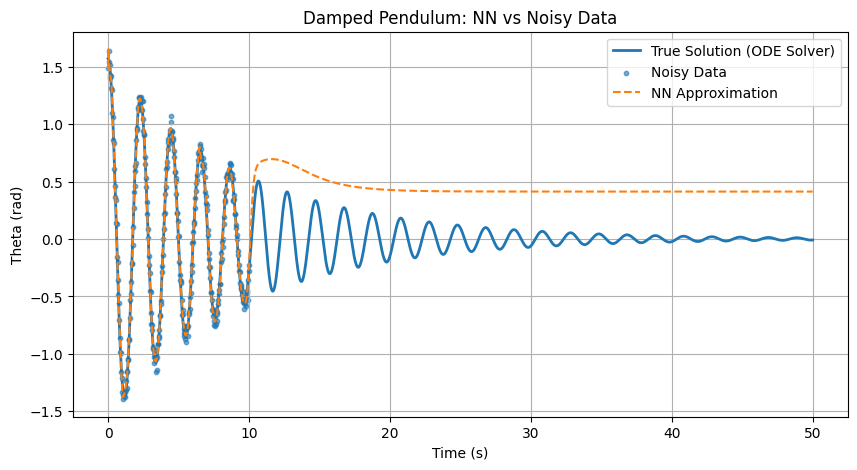

In [64]:
# Generate predictions

t_span = (0, 50)
t_test = torch.linspace(*t_span, 5000).reshape(-1, 1)  # Training time points


theta_nn = model(t_test).detach().numpy()

y0 = [np.pi / 2, 0]  # Initial conditions
sol = solve_ivp(damped_pendulum, t_span, y0, t_eval=t_test.numpy().flatten(), args=(true_b, c))



# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t_test.numpy(), sol.y[0], label="True Solution (ODE Solver)", linewidth=2, )
plt.scatter(t_train.numpy(), theta_noisy.numpy(), label="Noisy Data", s=10, alpha=0.6)
plt.plot(t_test.numpy(), theta_nn, label="NN Approximation", linestyle="dashed")
plt.xlabel("Time (s)")
plt.ylabel("Theta (rad)")
plt.title(f"Damped Pendulum: NN vs Noisy Data")
plt.legend()
plt.grid()
plt.show()

## Hamiltonian Neural Networks

In [66]:
class HamiltonianTrue:
    def __init__(self):
        self.k = 2.4
        self.gamma = 0.2

    def hamiltonian_fn(self, coords):
        """
        Hamiltonian function for a damped pendulum.
        """
        q, p = torch.chunk(coords, 2, dim=-1)  # Ensure proper splitting
        H = self.k * (1 - torch.cos(q)) + p**2  # Standard pendulum Hamiltonian
        D = self.gamma * p**2  # Quadratic damping
        return H - D  # Energy loss due to dissipation

    def time_derivative(self, t, state):
        """
        Compute dq/dt and dp/dt using the Hamiltonian function and autograd.
        """
        state = torch.tensor(state, dtype=torch.float32, requires_grad=True).view(1, -1)  # Ensure shape
        H = self.hamiltonian_fn(state)  # Compute the Hamiltonian
        dH = torch.autograd.grad(H.sum(), state, create_graph=True)[0]  # Compute gradients

        dq_dt = dH[0, 1]  # ∂H/∂p
        dp_dt = -dH[0, 0] - self.gamma * dH[0, 1]  # -∂H/∂q - damping term
        return [dq_dt.item(), dp_dt.item()]

    def integrate(self, t_span=[0, 10], y0=[np.pi / 2, 0], resolution=1000):
        sol = solve_ivp(lambda t, y: self.time_derivative(t, y), t_span, y0, t_eval=np.linspace(*t_span, resolution))
        return sol.t, sol.y[0], sol.y[1]

    def get_field(self, xmin=-np.pi/2, xmax=np.pi/2, ymin=-np.pi/2, ymax=np.pi/2, gridsize=20):
        """
        Computes the vector field (q, p, dq/dt, dp/dt) for the dynamical system.

        Args:
            xmin, xmax: Range for q (angle).
            ymin, ymax: Range for p (momentum).
            gridsize: Number of points in each dimension.

        Returns:
            ys.T: Grid points.
            dydt.T: Corresponding velocity vectors (dq/dt, dp/dt).
        """
        # Create a grid in phase space
        b, a = np.meshgrid(np.linspace(xmin, xmax, gridsize), np.linspace(ymin, ymax, gridsize))
        ys = np.stack([b.flatten(), a.flatten()], axis=1)  # Shape (N, 2)

        # Compute the vector field at each grid point
        dydt = np.array([self.time_derivative(None, y) for y in ys])  # Shape (N, 2)

        return ys, dydt


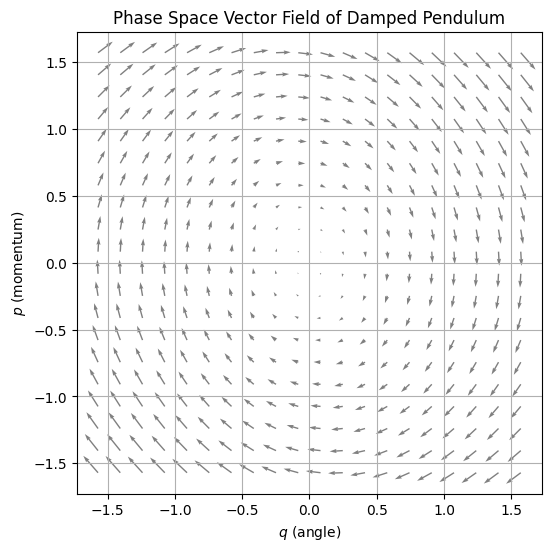

In [67]:
# Initialize system
hamiltonian_true = HamiltonianTrue()

# Get the vector field
field, directions = hamiltonian_true.get_field(gridsize=20)

# Plot configuration
fig, ax = plt.subplots(figsize=(6, 6))
ax.quiver(field[:, 0], field[:, 1], directions[:, 0], directions[:, 1], color="gray", angles='xy')

plt.xlabel("$q$ (angle)")
plt.ylabel("$p$ (momentum)")
plt.title("Phase Space Vector Field of Damped Pendulum")
plt.grid()
plt.show()

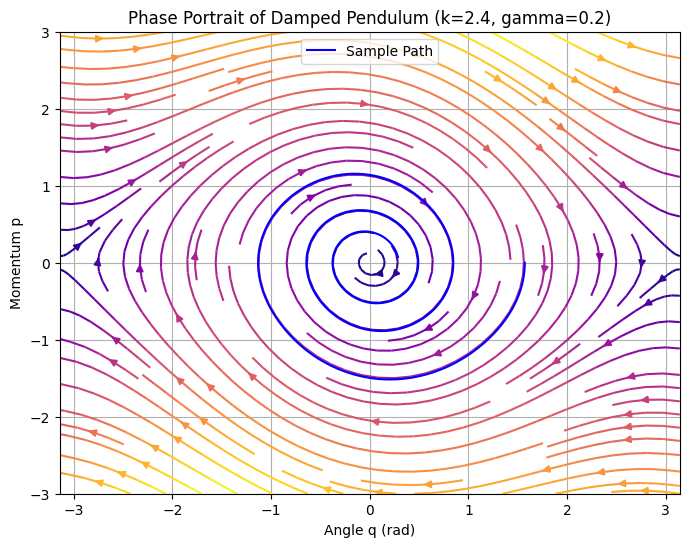

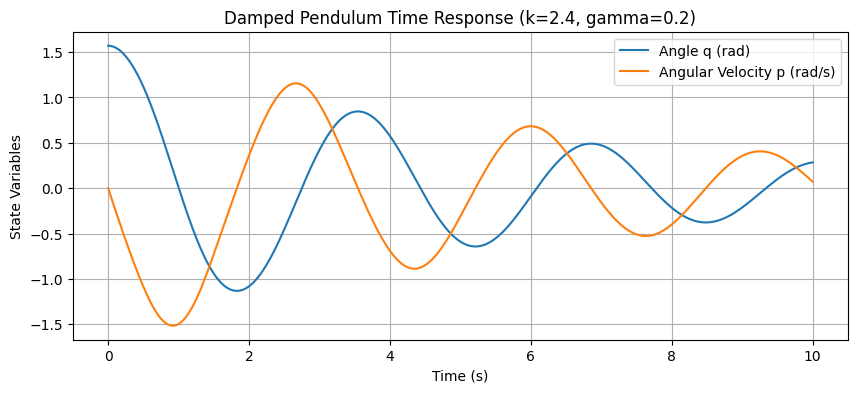

In [68]:
def plot_phase_portrait(k=hamiltonian_true.k, gamma=hamiltonian_true.gamma, q_range=(-np.pi, np.pi), p_range=(-3, 3), grid_size=20):
    """
    Plots the phase portrait of the damped pendulum with a sample trajectory.
    """
    q_vals = np.linspace(q_range[0], q_range[1], grid_size)
    p_vals = np.linspace(p_range[0], p_range[1], grid_size)
    Q, P = np.meshgrid(q_vals, p_vals)

    dQ, dP = np.zeros(Q.shape), np.zeros(P.shape)
    for i in range(Q.shape[0]):
        for j in range(Q.shape[1]):
            dQ[i, j], dP[i, j] = hamiltonian_true.time_derivative(0, [Q[i, j], P[i, j]])

    plt.figure(figsize=(8, 6))
    plt.streamplot(Q, P, dQ, dP, color=np.sqrt(dQ**2 + dP**2), cmap='plasma', density=1.2)

    # Solve and plot a single trajectory
    t_span = [0, 10]
    y0 = [np.pi / 2, 0]  # Initial condition: (q0, p0)
    sol = hamiltonian_true.integrate(t_span, y0)
    plt.plot(sol[1], sol[2], 'b', label="Sample Path")

    plt.xlabel("Angle q (rad)")
    plt.ylabel("Momentum p")
    plt.title(f"Phase Portrait of Damped Pendulum (k={k}, gamma={gamma})")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Time Response
    plt.figure(figsize=(10, 4))
    plt.plot(sol[0], sol[1], label="Angle q (rad)")
    plt.plot(sol[0], sol[2], label="Angular Velocity p (rad/s)")
    plt.xlabel("Time (s)")
    plt.ylabel("State Variables")
    plt.title(f"Damped Pendulum Time Response (k={k}, gamma={gamma})")
    plt.legend()
    plt.grid()
    plt.show()



# Run the phase plot function
plot_phase_portrait()

In [70]:
def generate_noisy_data(samples=100, noise_std=0.05, t_span = [0, 10], y0 = [np.pi / 2, 0]):
    """
    Generates synthetic data from HamiltonianTrue and adds Gaussian noise.

    Args:
        samples: Number of samples to generate.
        noise_std: Standard deviation of the noise.

    Returns:
        Torch tensors for training: (q, p, dq/dt, dp/dt)
    """
    t_eval = np.linspace(*t_span, samples)

    # Integrate the true system
    sol = hamiltonian_true.integrate(t_span, y0, resolution=samples)
    q, p = sol[1], sol[2]

    dq_dt, dp_dt = np.array([hamiltonian_true.time_derivative(0, [q_i, p_i]) for q_i, p_i in zip(q, p)]).T

    # # Compute derivatives
    # dq_dt, dp_dt = np.gradient(q, t_eval), np.gradient(p, t_eval)

    # Add Gaussian noise
    q += np.random.normal(0, noise_std, q.shape)
    p += np.random.normal(0, noise_std, p.shape)
    dq_dt += np.random.normal(0, noise_std, dq_dt.shape)
    dp_dt += np.random.normal(0, noise_std, dp_dt.shape)

    # Convert to Torch tensors
    q, p, dq_dt, dp_dt = map(lambda x: torch.tensor(x, dtype=torch.float32), [q, p, dq_dt, dp_dt])

    return q, p, dq_dt, dp_dt, t_eval

# Prepare dataset

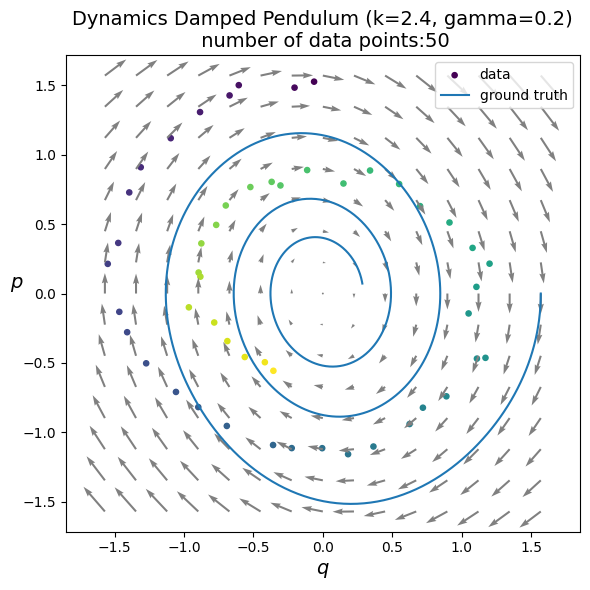

In [79]:
# Generate dataset
q_noisy, p_noisy, dq_dt_noisy, dp_dt_noisy, t_noisy = generate_noisy_data(samples=50, noise_std=0.05, t_span = [0, 5], y0 = [np.pi / 2, 0])
q_true, p_true, dq_dt_true, dp_dt_true, t_true = generate_noisy_data(noise_std=0.0, samples=1000)

field = hamiltonian_true.get_field(gridsize=15)

# plot config
fig = plt.figure(figsize=(6, 6), facecolor='white')

plt.scatter(p_noisy,q_noisy,c=t_noisy,s=14, label='data')
plt.plot(q_true, p_true, label='ground truth')
plt.quiver(field[0][:,0], field[0][:,1], field[1][:,0], field[1][:,1],
           cmap='gray_r', color=(.5,.5,.5))
plt.xlabel("$q$", fontsize=14)
plt.ylabel("$p$", rotation=0, fontsize=14)
plt.title(f"Dynamics Damped Pendulum (k={hamiltonian_true.k}, gamma={hamiltonian_true.gamma})\n number of data points:{len(t_noisy)}", fontsize=14)
plt.legend(loc='upper right')
plt.axis('equal')

plt.tight_layout() ; plt.show()

In [80]:
dataset = TensorDataset(torch.stack([q_noisy, p_noisy], dim=1), torch.stack([dq_dt_noisy, dp_dt_noisy], dim=1))
train_loader = DataLoader(dataset, batch_size=min(32, len(q_noisy)//4), shuffle=True)

In [81]:
import torch.nn as nn
# Define Multi-Layer Perceptron (MLP)
# Corrected MLP class
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim):
        """
        Multi-Layer Perceptron for the HNN.

        Args:
            input_dim: Number of input features.
            output_dim: Number of output features.
            hidden_dim: Number of hidden neurons.
        """
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x, t=None):
        inputs = torch.cat([x, t], axis=-1) if t is not None else x
        return self.net(inputs)


    def integrate(self, t_span=[0, 10], y0=[np.pi / 2, 0], resolution=1000):
        """
        Integrates the learned system dynamics over time using solve_ivp.

        Args:
            t_span: Time range for integration.
            y0: Initial conditions [q0, p0].
            resolution: Number of time steps.

        Returns:
            t, q, p: Time steps and corresponding trajectories.
        """
        sol = solve_ivp(
            lambda t, y: self.forward(torch.tensor(y, dtype=torch.float32, requires_grad=True).view(1, -1)).detach().numpy().flatten(),
            t_span, y0, t_eval=np.linspace(*t_span, resolution)
        )
        return sol.t, sol.y[0], sol.y[1]

# Define Hamiltonian Neural Network (HNN)
class HNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.mlp = MLP(input_dim, 1, hidden_dim)

    def forward(self, x, t=None):
        inputs = torch.cat([x, t], axis=-1) if t is not None else x
        H = self.mlp(inputs)[..., 0]
        H_grads = torch.autograd.grad(H.sum(), x, create_graph=True)[0]
        dHdq, dHdp = torch.split(H_grads, H_grads.shape[-1] // 2, dim=1)
        return torch.cat([dHdp, -dHdq], axis=-1)

    def predict_hamiltonian(self, x, t=None):
        return self.mlp(x, t)

    def integrate(self, t_span=[0, 10], y0=[np.pi / 2, 0], resolution=1000):
        """
        Integrates the learned system dynamics over time using solve_ivp.

        Args:
            t_span: Time range for integration.
            y0: Initial conditions [q0, p0].
            resolution: Number of time steps.

        Returns:
            t, q, p: Time steps and corresponding trajectories.
        """
        sol = solve_ivp(
            lambda t, y: self.forward(torch.tensor(y, dtype=torch.float32, requires_grad=True).view(1, -1)).detach().numpy().flatten(),
            t_span, y0, t_eval=np.linspace(*t_span, resolution)
        )
        return sol.t, sol.y[0], sol.y[1]

    def save_model(self, model_path="hnn_weights.pth"):
        """Save the model's state_dict to a file."""
        torch.save(self.state_dict(), model_path)
        print(f"Model weights saved to {model_path}")

    def load_model(self, model_path="hnn_weights.pth"):
        """Load the model's state_dict from a file."""
        self.load_state_dict(torch.load(model_path))
        self.eval()  # Set the model to evaluation mode
        print(f"Model weights loaded from {model_path}")


class DHNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.mlp_h = MLP(input_dim, 1, hidden_dim)  # Conservative component
        self.mlp_d = MLP(input_dim, 1, hidden_dim)  # Dissipative component

    def forward(self, x, t=None, as_separate=False):
        inputs = torch.cat([x, t], axis=-1) if t is not None else x
        D = self.mlp_d(inputs)
        H = self.mlp_h(inputs)

        # Compute gradients
        irr_component = torch.autograd.grad(D.sum(), x, create_graph=True, retain_graph=True)[0]
        rot_component = torch.autograd.grad(H.sum(), x, create_graph=True, retain_graph=True)[0]

        # Compute time derivatives
        dHdq, dHdp = torch.split(rot_component, rot_component.shape[-1] // 2, dim=1)
        q_dot_hat, p_dot_hat = dHdp, -dHdq
        rot_component = torch.cat([q_dot_hat, p_dot_hat], axis=-1)

        if as_separate:
            return irr_component, rot_component

        return irr_component + rot_component

    def predict_hamiltonian(self, x, t=None):
        x = x.view(-1, 2)  # Ensure correct shape
        predicted_H = self.mlp_h(x)
        predicted_D = self.mlp_d(x)
        total_H = predicted_H - predicted_D
        return total_H

    def integrate(self, t_span=[0, 10], y0=[np.pi / 2, 0], resolution=1000):
        """
        Integrates the learned system dynamics over time using solve_ivp.

        Args:
            t_span: Time range for integration.
            y0: Initial conditions [q0, p0].
            resolution: Number of time steps.

        Returns:
            t, q, p: Time steps and corresponding trajectories.
        """
        sol = solve_ivp(
            lambda t, y: self.forward(torch.tensor(y, dtype=torch.float32, requires_grad=True).view(1, -1)).detach().numpy().flatten(),
            t_span, y0, t_eval=np.linspace(*t_span, resolution)
        )
        return sol.t, sol.y[0], sol.y[1]

    def save_model(self, model_path="dhnn_weights.pth"):
        torch.save(self.state_dict(), model_path)
        print(f"Model weights saved to {model_path}")

    def load_model(self, model_path="dhnn_weights.pth"):
        self.load_state_dict(torch.load(model_path))
        self.eval()
        print(f"Model weights loaded from {model_path}")

In [82]:
# Define Loss Function and Optimizer
def train_hnn(model, train_loader, epochs=100):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=1000, factor=0.5)
    loss_fn = nn.MSELoss()
    loss_history = []
    increments_per_epoch = 100

    with tqdm(total=epochs) as pbar:
        total_loss = 0
        for epoch in range(epochs):
            for batch in train_loader:
                (x_batch, y_batch) = batch  # (q, p), (dq/dt, dp/dt)

                x_batch.requires_grad = True  # Needed for autograd
                y_pred = model(x_batch)  # Predict dynamics

                loss = loss_fn(y_pred, y_batch)  # Compute loss
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                scheduler.step(loss)
                total_loss += loss.item()

            if epoch % increments_per_epoch == 0:
                loss_history.append(loss.item())
                # Update pbar description with current loss and the last learning rate
                pbar.set_description(f'Epoch {epoch}, Loss: {loss.item():.4f}, LR: {optimizer.param_groups[0]["lr"]:.6f}')
            pbar.update()

        # Plotting the loss history
    plt.figure(figsize=(10, 5))
    plt.semilogy(np.arange(0, epochs, increments_per_epoch), loss_history, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss of HNN over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Training complete!")

def evaluate_hnn(model, model_name='HNN', k=hamiltonian_true.k, gamma=hamiltonian_true.gamma):
    """
    Evaluates the HNN model and plots predictions vs true dynamics.
    """
    # Integrate model and true system
    t_span=[0, 50]
    y0=[np.pi / 2, 0]
    resolution=1000
    t_pred, q_pred, p_pred = model.integrate(t_span=t_span, y0=y0, resolution=resolution)
    t_true, q_true, p_true = hamiltonian_true.integrate(t_span=t_span, y0=y0, resolution=resolution)

    # Create a subplot grid (2 rows, 2 columns) for better organization
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Plot q(t) - True vs Predicted
    axes[0, 0].plot(t_true, q_true, label="True q", linestyle='-', color='blue', linewidth=2)
    axes[0, 0].plot(t_pred, q_pred, label="Predicted q", linestyle='--', color='red', linewidth=2)
    axes[0, 0].scatter(t_noisy, q_noisy, label="Data", c=t_noisy, s=14, cmap="viridis", alpha=0.9)
    axes[0, 0].set_xlabel("Time Steps")
    axes[0, 0].set_ylabel("q")
    axes[0, 0].legend()
    axes[0, 0].set_title(f"{model_name} Predictions vs True: q(t)")
    axes[0, 0].grid(True)

    # Plot p(t) - True vs Predicted
    axes[0, 1].plot(t_true, p_true, label="True p", linestyle='-', color='blue', linewidth=2)
    axes[0, 1].plot(t_pred, p_pred, label="Predicted p", linestyle='--', color='red', linewidth=2)
    axes[0, 1].scatter(t_noisy, p_noisy, label="Data", c=t_noisy, s=14, cmap="plasma", alpha=0.9)
    axes[0, 1].set_xlabel("Time Steps")
    axes[0, 1].set_ylabel("p")
    axes[0, 1].legend()
    axes[0, 1].set_title(f"{model_name} Predictions vs True: p(t)")
    axes[0, 1].grid(True)

    # Plot phase space (q, p) - True vs Predicted
    axes[1, 0].plot(q_true, p_true, label="True", linestyle='-', color='blue', linewidth=2)
    axes[1, 0].plot(q_pred, p_pred, label="Predicted", linestyle='--', color='red', linewidth=2)
    scatter = axes[1, 0].scatter(q_noisy, p_noisy, c=t_noisy, s=14, cmap="coolwarm", alpha=0.9, label='Data')
    axes[1, 0].set_xlabel("q")
    axes[1, 0].set_ylabel("p")
    axes[1, 0].legend()
    axes[1, 0].set_title(f"{model_name} Phase Space: Predictions vs True")
    axes[1, 0].grid(True)
    fig.colorbar(scatter, ax=axes[1, 0], label="Time")
    try:
        # Compute and plot Hamiltonian evolution
        coords_true = torch.stack([torch.tensor(q_true, dtype=torch.float32),
                                   torch.tensor(p_true, dtype=torch.float32)], dim=1)
        true_H = hamiltonian_true.hamiltonian_fn(coords_true).detach().numpy()

        coords_pred = torch.stack([torch.tensor(q_pred, dtype=torch.float32),
                                   torch.tensor(p_pred, dtype=torch.float32)], dim=1)
        predicted_H = model.predict_hamiltonian(coords_pred).detach().numpy()

        axes[1, 1].plot(true_H, label="True Hamiltonian", color='purple', linewidth=2)
        axes[1, 1].plot(predicted_H, label="Predicted Hamiltonian", linestyle="dashed", color='orange', linewidth=2)
        axes[1, 1].set_xlabel("Time Steps")
        axes[1, 1].set_ylabel("Hamiltonian Value")
        axes[1, 1].set_title("Hamiltonian Evolution Over Time")
        axes[1, 1].legend()
        axes[1, 1].grid(True)
    except:
        print("Hamiltonian prediction failed")

    plt.suptitle(f"{model_name} Results (k={k} and gamma={gamma})")
    plt.tight_layout()

    plt.show()

In [83]:
# Initialize and train the HNN
input_dim = 2
hidden_dim = 64


Epoch 4900, Loss: 0.0037, LR: 0.000000: 100%|██████████| 5000/5000 [00:09<00:00, 543.69it/s]


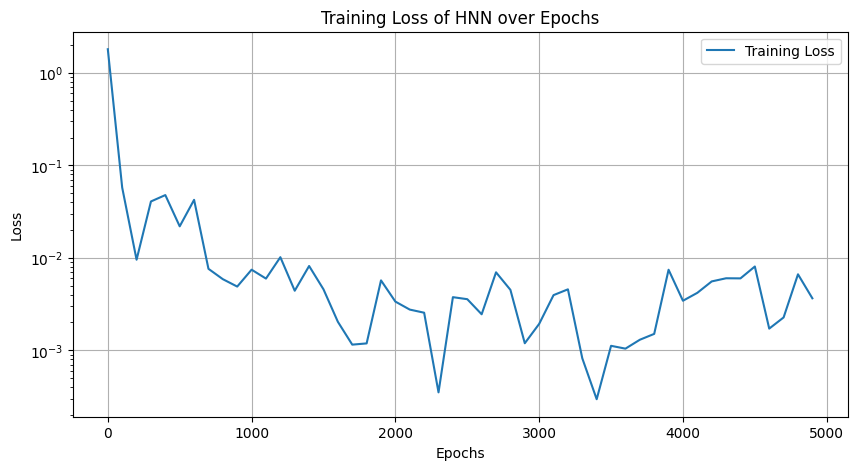

Training complete!


In [84]:
hnn_model = HNN(input_dim, hidden_dim)
train_hnn(hnn_model, train_loader, epochs=5000)

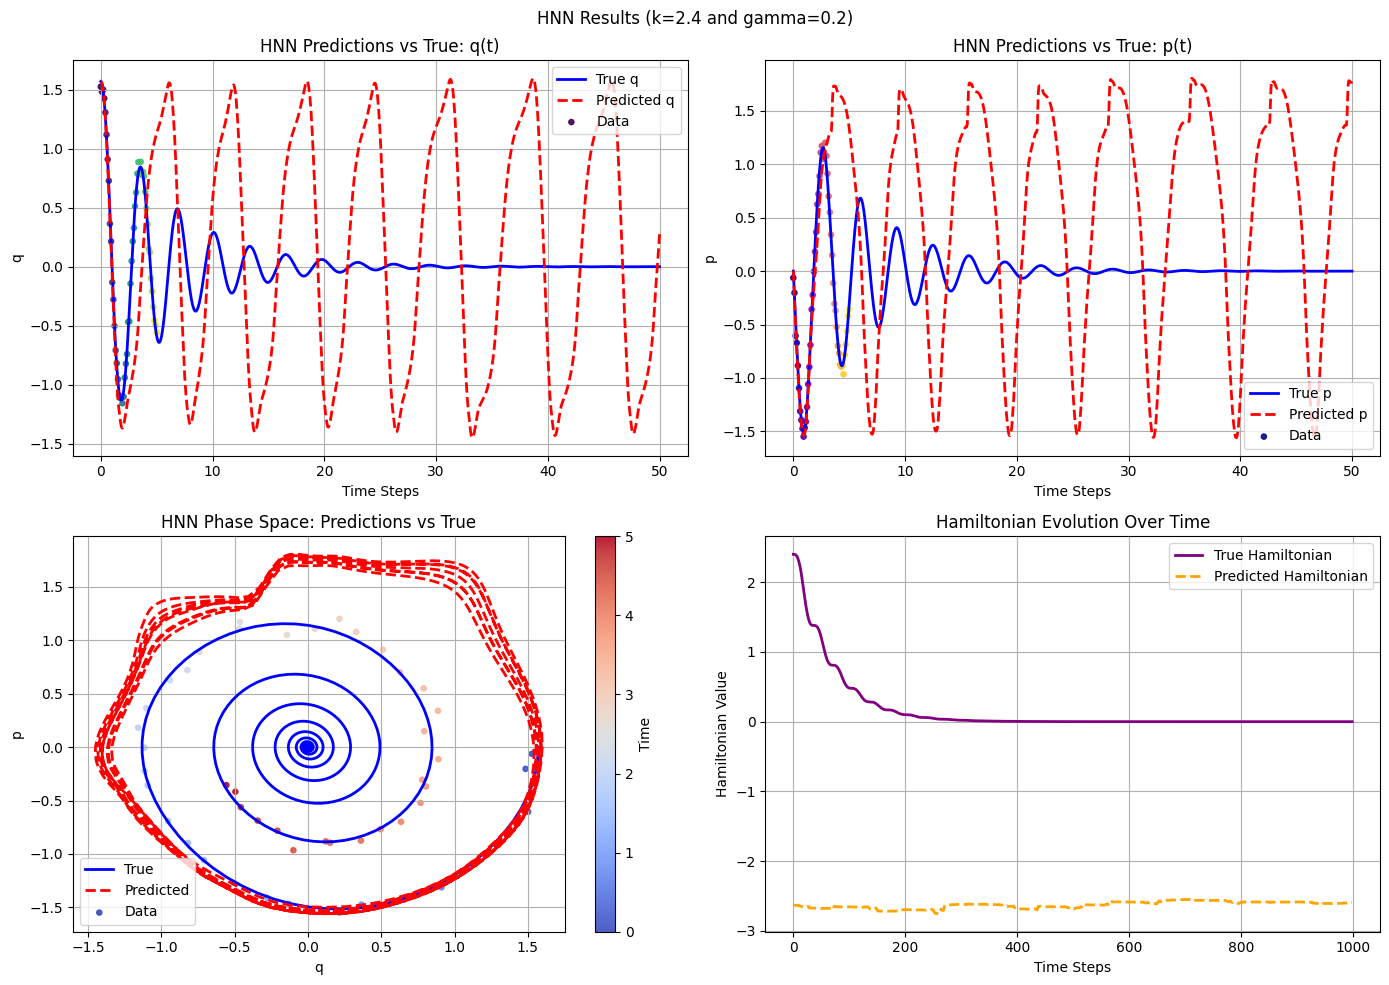

In [85]:
evaluate_hnn(hnn_model)

Epoch 4900, Loss: 0.0011, LR: 0.000000: 100%|██████████| 5000/5000 [00:14<00:00, 338.11it/s]


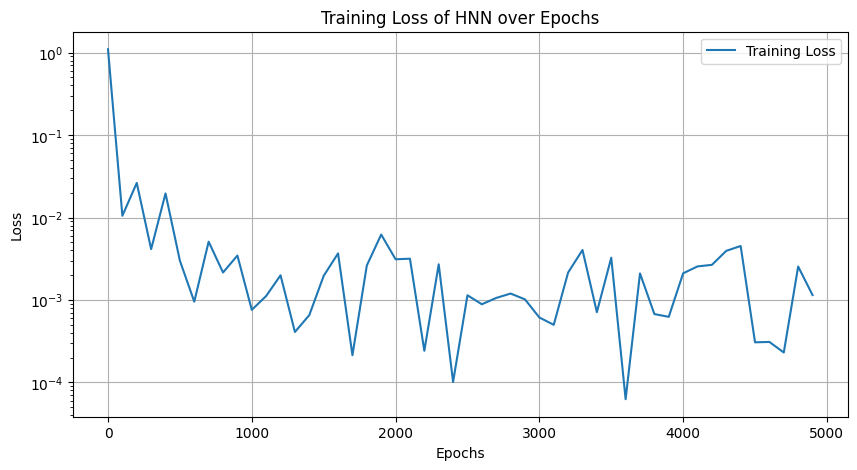

Training complete!


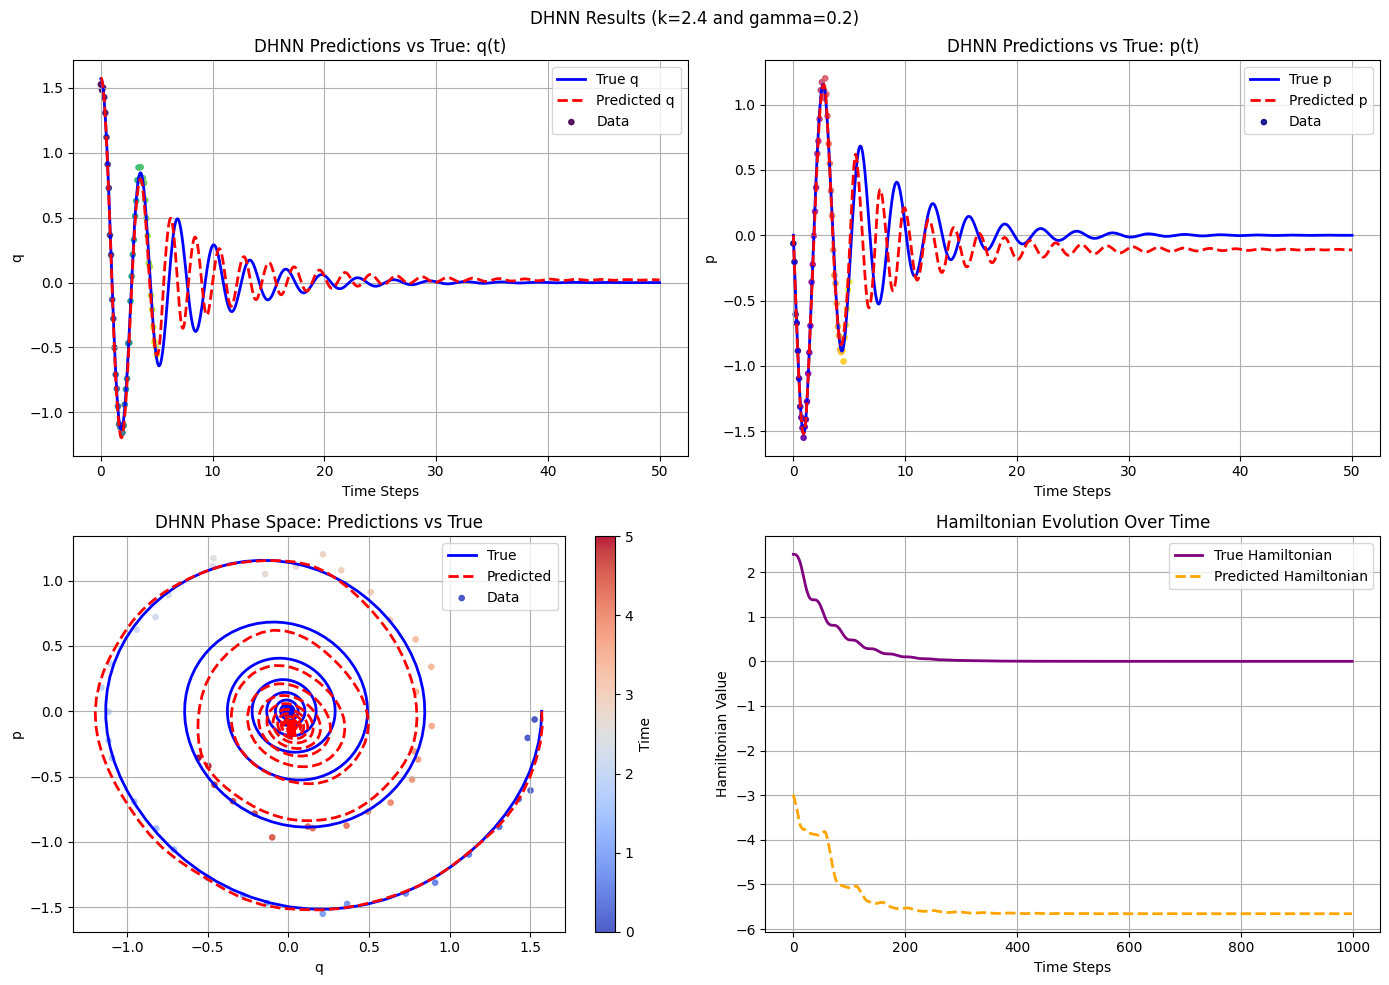

In [86]:
dhnn_model = DHNN(input_dim, hidden_dim)
train_hnn(dhnn_model, train_loader, epochs=5000)
evaluate_hnn(dhnn_model, model_name='DHNN')

Epoch 4900, Loss: 0.0028, LR: 0.000000: 100%|██████████| 5000/5000 [00:07<00:00, 690.86it/s]


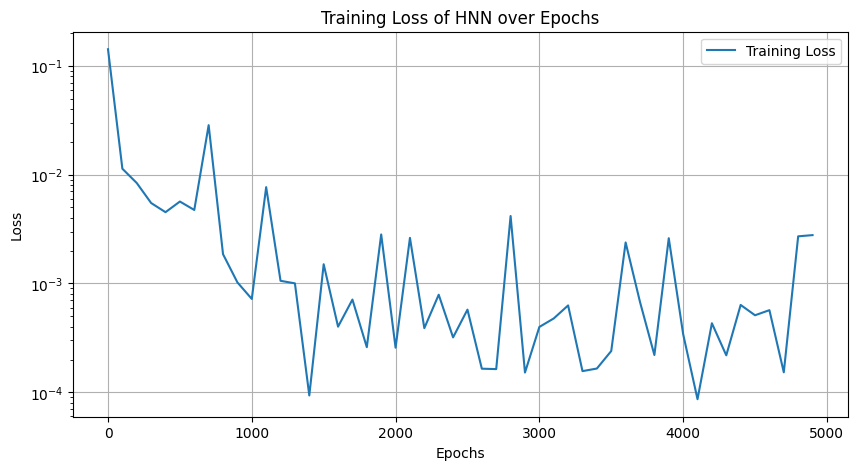

Training complete!
Hamiltonian prediction failed


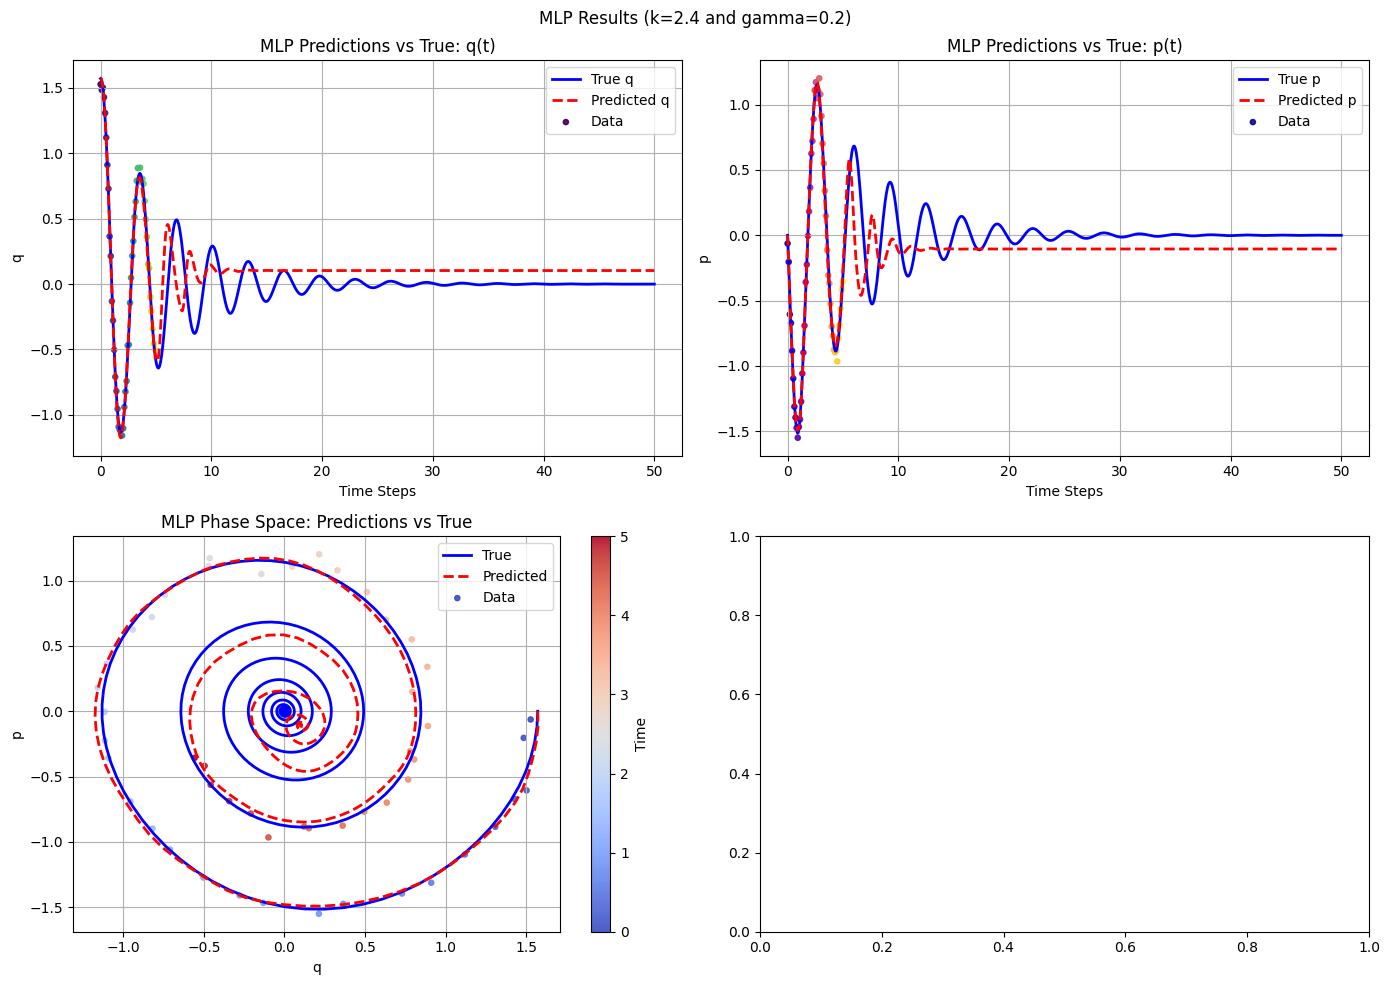

In [87]:
nn_model = MLP(input_dim, 2, hidden_dim)
train_hnn(nn_model, train_loader, epochs=5000)
# Re-run evaluation
evaluate_hnn(nn_model, model_name='MLP')